In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/weight-height.csv')

In [5]:
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [6]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [33]:
df.shape

(10000, 3)

### Outliers detection using histogram

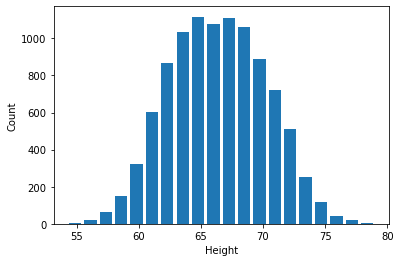

In [75]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel ('Height')
plt.ylabel('Count')
plt.show()

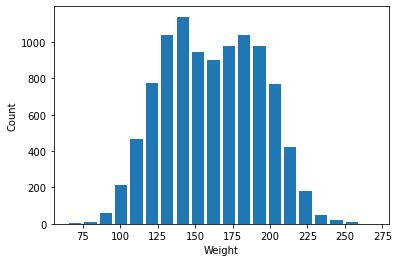

In [74]:
plt.hist(df.Weight, bins=20, rwidth=0.8)
plt.xlabel ('Weight')
plt.ylabel('Count')
plt.show()

### outliers identification using boxplot

In [83]:
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

<function matplotlib.pyplot.show(close=None, block=None)>

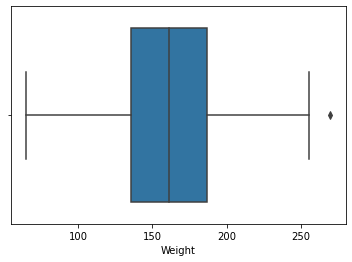

In [84]:
sns.boxplot(df['Weight'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

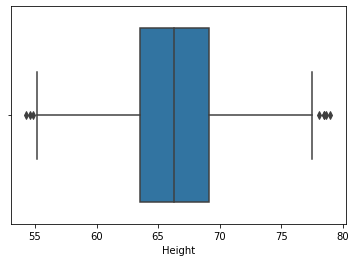

In [85]:
sns.boxplot(df['Height'])
plt.show

## Outliers Detection using IQR

#### -------------------- Outliers detection on Weight-------------------------------

In [49]:
Q1 = df.Weight.quantile(0.25)
Q3 = df.Weight.quantile(0.75)
Q1, Q3

(135.8180513055015, 187.16952486868348)

In [50]:
IQR = Q3-Q1
IQR

51.35147356318197

In [51]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [52]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

#### Displaying outliers list

In [54]:
df[(df.Weight<lower_limit)|(df.Weight>upper_limit)]


,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [55]:
df.shape

(10000, 3)

#### Removing Outliers

In [59]:
#create new dataframe df1
df1  = df[(df.Weight>lower_limit) & (df.Weight<upper_limit)]


In [60]:
df1.shape   #one row is removed

(9999, 3)

 #### Dataset after outliers removal

In [61]:
df1.Weight.describe()

count    9999.000000
mean      161.429501
std        32.091686
min        64.700127
25%       135.817009
50%       161.201891
75%       187.152394
max       255.863326
Name: Weight, dtype: float64

### -----------------Outliers Detection on Height-------------------

In [62]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [63]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [65]:
LOWER_LIMIT = Q1 - 1.5 *IQR
UPPER_LIMIT = Q3 + 1.5 *IQR
LOWER_LIMIT, UPPER_LIMIT

(55.00265861279534, 77.67722359525831)

#### Displaying outliers list

In [67]:
df[(df.Height<LOWER_LIMIT)|(df.Height>UPPER_LIMIT)]


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


#### Removing outliers

In [68]:
df2 = df[(df.Height>LOWER_LIMIT) & (df.Height<UPPER_LIMIT)]  #new dataframe df2

In [70]:
df2.shape

(9992, 3)

In [73]:
df2.describe()

,Height,Weight
count,9992.000000,9992.000000
mean,66.365006,161.422760
std,3.833980,32.019872
min,55.148557,68.982530
25%,63.509087,135.821269
50%,66.317827,161.197662
75%,69.169386,187.124646
max,77.547186,255.863326


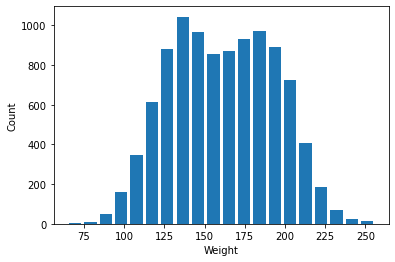

In [90]:
plt.hist(df1.Weight, bins=20, rwidth=0.8)
plt.xlabel ('Weight')
plt.ylabel('Count')
plt.show()

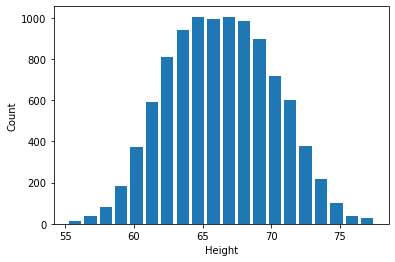

In [91]:
plt.hist(df2.Height, bins=20, rwidth=0.8)
plt.xlabel ('Height')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

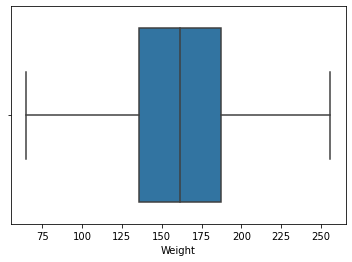

In [89]:
sns.boxplot(df1['Weight'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

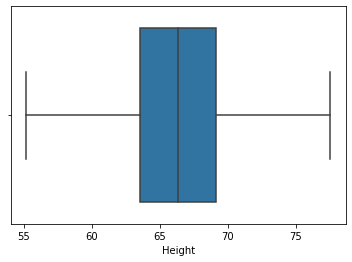

In [88]:
sns.boxplot(df2['Height'])
plt.show